# Basic Option Strategies Notebook

### Thomas Polstra -- Assistant Professor of Mathematics -- University of Alabama

##### [GitHub](https://github.com/thomaspolstra/Quant_Materials_Polstra_Public.git) -- [Academic Website](https://thomaspolstra.github.io/) -- [Email](mailto:thomaspolstra@gmail.com)

## Purpose:
This notebook explores basic option strategies using Python. The goal is to create custom functions that analyze and visualize common single stock option strategies, such as puts, calls, straddles, and more. By creating these functions, we aim to better understand how different option strategies work, calculate break-even points, and generate profit and loss (P&L) graphs to visualize potential outcomes.

## Contents:
1. Introduction to Options:
   - What are options?
   - Call options vs. put options.
   - Option terminology.

2. Basic Option Strategies and Function Implementations:
   - Long Call Option.
   - Long Put Option.
   - Short Call Option.
   - Short Put Option.
   - Covered Call.
   - Protective Put.
   - Straddle.
   - Strangle.
   - Bull Call Spread.
   - Bear Put Spread.

**Custom Function Design**
   - Calculate the value of an option strategy position
   - Calculate break-even/at-the-money spot-price(s)
   - Generating profit and loss (P&L) graphs

# Introduction to Options

### What are Options?
Options are financial derivatives that give the buyer the right, but not the obligation, to buy or sell an underlying asset at a predetermined price (strike price) within a specified period (expiration date). The underlying asset can be stocks, indexes, commodities, or other financial instruments.

### Call Options vs. Put Options
- **Call Options**: Call options give the buyer the right to buy the underlying asset at the strike price. Call option holders benefit from a rising market, as they can purchase the asset at a lower price (strike price) and sell it at a higher market price.
- **Put Options**: Put options give the buyer the right to sell the underlying asset at the strike price. Put option holders benefit from a falling market, as they can sell the asset at a higher strike price and avoid potential losses in a declining market.

### Option Terminology
- **Premium**: The price paid by the option buyer to the option seller for obtaining the right. It represents the cost of the option.
- **Strike Price**: The predetermined price at which the underlying asset can be bought or sold.
- **Expiration Date**: The date when the option contract expires. After this date, the option is no longer valid.
- **In-the-Money (ITM)**: For a call option, when the market price is above the strike price. For a put option, when the market price is below the strike price.
- **Out-of-the-Money (OTM)**: For a call option, when the market price is below the strike price. For a put option, when the market price is above the strike price.
- **At-the-Money (ATM)**: When the market price is equal to the strike price.
- **Spot Price/Asset Price**: Price of the underlying asset.

# Basic Option Strategies

In this section, we explore the following basic option strategies:

1. Long Call
2. Long Put
3. Short Call
4. Short Put
5. Covered Call
6. Protective Put
7. Straddle
8. Strangle
9. Bull Call Spread
10. Bear Put Spread

Custom functions are created to find the value of a strategy at a given spot price of the underlying asset as well as create profit & loss (P&L) graphs for a desired range of spot prices.

The following terminology is used for option strategies:
- **Spot Price/Asset Price**: The market price of the underlying asset.
- **Strike Price**: The predetermined price at which the option can be exercised.
- **Premium**: The cost of buying or selling the option contract.
- **Expiration Date**: The date when the option contract expires.
- **P&L Graph**: A graphical representation of the profit or loss for the option strategy at various spot prices.

## Strategy 1: Long Call

A **long call** is a bullish option strategy where an investor buys a call option on a specific underlying asset. The buyer of the call option has the right, but not the obligation, to purchase the underlying asset at the strike price on or before the expiration date.

Key characteristics of a long call:
- **Objective**: Profit from an increase in the price of the underlying asset.
- **Risk**: Limited to the premium paid for the call option.
- **Breakeven Point**: The spot price at which the long call strategy becomes profitable.

**Breakeven Price for Long Call**

To calculate the breakeven price for a long call, we need the following inputs:
- **Spot Price**: The current market price of the underlying asset.
- **Strike Price**: The predetermined price at which the call option can be exercised.
- **Premium**: The cost of buying the call option.

The breakeven price is the spot price at which the payoff from exercising the call option covers the initial premium paid, resulting in no profit or loss.

**Risk and Considerations**

A long call option is a bullish investment strategy with a moderate to high risk profile. In this options strategy, an investor purchases the right to buy a specific asset, such as a stock, at a predetermined price (strike price) on or before the expiration date. The potential for significant gains exists if the underlying asset's price rises substantially above the strike price, allowing the holder to profit from the price difference. However, the risk lies in the limited lifespan of the option, as it will become worthless if the asset's price does not rise above the strike price by the expiration date.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def long_call_breakeven(strike_price, premium):
    breakeven_price = strike_price + premium
    return breakeven_price

def call_value(spot_price, strike_price):
    a = spot_price - strike_price
    return np.max([a, 0])

def long_call_profit_loss_graph(spot_price, strike_price, premium):
    profit_loss = np.maximum(spot_price - strike_price - premium, -premium)
    
    plt.figure(figsize=(8, 6))
    sns.set_style('dark')  # Set the dark theme with black grid
    sns.set_palette('tab10')  # Set a color palette for the lines
    
    plt.plot(spot_price, profit_loss, color='blue', lw=2, label = 'Profit and Loss')
    plt.axhline(0, color='black', ls='--', lw=2)  # Breakeven line
    plt.axvline(strike_price + premium, color='red', ls='--', lw=2, label = 'Breakeven')  # Breakeven price
    plt.xlabel('Spot Price')
    plt.ylabel('Profit/Loss')
    plt.title('Long Call Option: Profit and Loss Graph')
    plt.grid(True, color='black', linestyle='--', alpha=0.5)  # Set the grid color to black
    plt.legend()
    #plt.scatter(spot_price, - premium, color='red', marker='o', label='Initial Position')
    plt.show()


Breakeven Price: 47.5


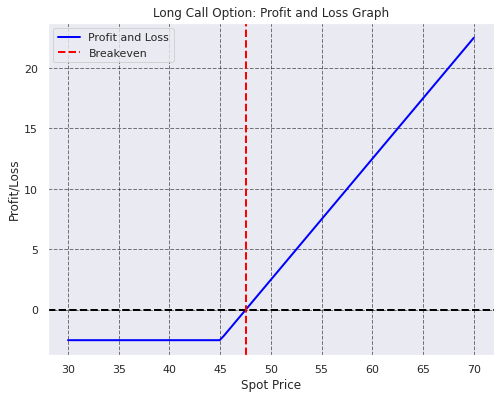

In [2]:
# Test the functions on the example
strike_price = 45.0
premium = 2.5

breakeven_price = long_call_breakeven(strike_price, premium)
print(f"Breakeven Price: {breakeven_price}")

spot_prices = np.linspace(30, 70, 100)
long_call_profit_loss_graph(spot_prices, strike_price, premium)

### Strategy 2: Long Put Strategy

A long put strategy involves buying put options with the expectation that the underlying asset's price will decrease significantly. By purchasing a put option, the investor gains the right to sell the underlying asset at the strike price before the option's expiration. This strategy is typically used when an investor believes that the stock price will decline significantly, and it provides downside protection.

**Breakeven Price for Long Put**

It is the strike price minus the premium paid for the put option.

**Risk and Considerations**

A long put option is a bearish investment strategy with a moderate to high risk profile. In this options strategy, an investor purchases the right to sell a specific asset, such as a stock, at a predetermined price (strike price) on or before the expiration date. The potential for significant gains exists if the underlying asset's price declines substantially below the strike price, allowing the holder to profit from the price difference. However, the risk lies in the limited lifespan of the option, as it will become worthless if the asset's price does not drop below the strike price by the expiration date. Therefore, while a long put offers the potential for substantial rewards when the market moves in the desired direction, investors should be aware of the risk of losing the entire premium paid for the option if the market moves favorably. As with any investment, careful consideration and risk management are essential for a successful long put strategy.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def put_value(spot_price, strike_price):
    a = strike_price - spot_price
    return np.max([a, 0])

def long_put_breakeven(spot_price, strike_price, premium):
    breakeven_price = strike_price - premium
    return breakeven_price

def long_put_profit_loss_graph(spot_price, strike_price, premium):
    profit_loss = np.maximum(strike_price - spot_price - premium, -premium)
    
    plt.figure(figsize=(8, 6))
    plt.plot(spot_price, profit_loss, color='blue', lw=2, label = 'Profit and Loss')
    plt.axhline(0, color='black', ls='--', lw=2)  # Breakeven line
    plt.axvline(strike_price - premium, color='red', ls='--', lw=2, label = 'Breakeven')  # Breakeven price
    plt.xlabel('Spot Price')
    plt.ylabel('Profit/Loss')
    plt.title('Long Put Option: Profit and Loss Graph')
    plt.grid(True, color='black', linestyle='--', alpha=0.5)  # Set the grid color to black
    plt.legend()
    plt.show()



Breakeven Price: 42.5


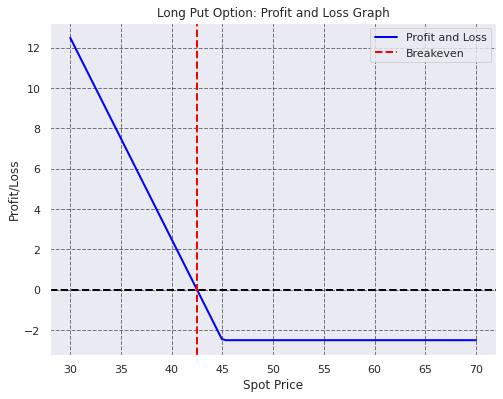

In [4]:
# Test the functions on the example
spot_prices = np.linspace(30, 70, 100)
strike_price = 45.0
premium = 2.5

breakeven_price = long_put_breakeven(spot_prices, strike_price, premium)
print(f"Breakeven Price: {breakeven_price}")

long_put_profit_loss_graph(spot_prices, strike_price, premium)

### Strategy 3: Short Call Option Strategy

A short call option strategy involves selling call options on an underlying asset that the investor does not own. The investor expects the price of the underlying asset to decline or remain below the strike price of the call option. By selling the call option, the investor receives a premium, which is the maximum potential profit for this strategy. However, the risk is unlimited, as the investor may have to sell the underlying asset at the strike price if the option buyer exercises the call option.

**Breakeven Price for Short Call**

The breakeven price for a short call option can be calculated using the following formula:

Breakeven Price = Strike Price + Premium Received


**Risk and Considerations**

A short call option is a bearish investment strategy with a high risk profile. In this options strategy, an investor sells the right to buy a specific asset, such as a stock, at a predetermined price (strike price) on or before the expiration date. The investor receives a premium for selling the call option but takes on the obligation to sell the asset if the option buyer decides to exercise the option. The potential for losses is substantial if the underlying asset's price rises above the strike price, as the investor will be forced to sell the asset at a lower price than its market value. The risk is theoretically unlimited if the asset's price increases significantly. This strategy is best suited for experienced traders who are confident that the asset's price will remain below the strike price, allowing them to profit from the premium received. However, given the high risk involved, careful risk management and monitoring of the market are crucial for a successful short call strategy.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def short_call_breakeven(strike_price, premium):
    breakeven_price = strike_price + premium
    return breakeven_price

def short_call_profit_loss_graph(spot_price, strike_price, premium):
    profit_loss = np.minimum(strike_price - spot_price + premium, premium)
    
    plt.figure(figsize=(8, 6))
    sns.set_style('dark')  # Set the dark theme with black grid
    sns.set_palette('tab10')  # Set a color palette for the lines
    
    plt.plot(spot_price, profit_loss, color='green', lw=2, label='Profit and Loss')
    plt.axhline(0, color='black', ls='--', lw=2)  # Breakeven line
    plt.axvline(strike_price + premium, color='red', ls='--', lw=2, label='Breakeven')  # Breakeven price
    plt.xlabel('Spot Price')
    plt.ylabel('Profit/Loss')
    plt.title('Short Call Option: Profit and Loss Graph')
    plt.grid(True, color='black', linestyle='--', alpha=0.5)  # Set the grid color to black
    plt.legend()
    plt.show()

Breakeven Price: 47.5


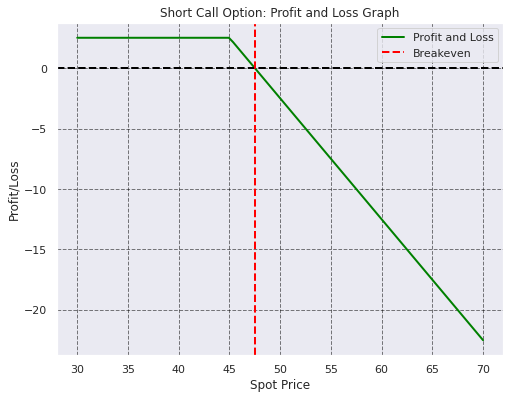

In [6]:
# Test the functions on the example
spot_prices = np.linspace(30, 70, 100)
strike_price = 45.0
premium = 2.5

breakeven_price = short_call_breakeven(strike_price, premium)
print(f"Breakeven Price: {breakeven_price}")

short_call_profit_loss_graph(spot_prices, strike_price, premium)

### Strategy 4: Short Put Option Strategy

The short put is a basic option strategy where the investor sells a put option with the expectation that the underlying asset's price will either rise or remain relatively stable. In this strategy, the option seller (writer) receives a premium from the option buyer (holder) in exchange for taking on the obligation to buy the underlying asset at the strike price if the option is exercised.

**Purpose**

The purpose of the short put strategy is to generate income from the premium received by selling the put option. The seller expects the price of the underlying asset to stay above or move higher than the strike price during the option's lifetime. If the option expires worthless (out-of-the-money), the seller keeps the premium as profit. However, if the option is exercised (in-the-money), the seller will be obligated to buy the underlying asset at the strike price, which may lead to potential losses.

**Breakeven Price for Short Put**

The breakeven price for a short put option can be calculated using the following formula:

Breakeven Price = Strike Price - Premium Received

To find the breakeven price, subtract the premium received from the strike price of the put option. If the underlying asset's price at expiration is below the breakeven price, the short put strategy will start to incur losses, and the losses will increase as the asset's price declines further below the breakeven price. Conversely, if the asset's price remains above the breakeven price, the investor keeps the premium as profit, and the strategy is profitable.

**Risk and Considerations**

The short put strategy involves unlimited risk and limited profit potential. The maximum profit is limited to the premium received, while the potential losses can be substantial if the underlying asset's price declines significantly. Therefore, it is crucial for investors to assess their risk tolerance and market outlook before employing this strategy.

Please note that short put writing exposes the investor to significant downside risk. If the underlying asset's price drops below the breakeven point (strike price minus premium), the losses can accumulate rapidly. It is essential to have a clear understanding of the risks involved and implement risk management strategies accordingly.

In the following section, we will explore how to calculate the breakeven price for the short put option and visualize the potential profit and loss using Python functions and graphs.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def short_put_breakeven(strike_price, premium):
    breakeven_price = strike_price - premium
    return breakeven_price

def short_put_profit_loss_graph(spot_price, strike_price, premium):
    profit_loss = np.minimum(spot_price - strike_price + premium, premium)
    
    plt.figure(figsize=(8, 6))
    sns.set_style('dark')  # Set the dark theme with black grid
    sns.set_palette('tab10')  # Set a color palette for the lines
    
    plt.plot(spot_price, profit_loss, color='orange', lw=2, label='Profit and Loss')
    plt.axhline(0, color='black', ls='--', lw=2)  # Breakeven line
    plt.axvline(strike_price - premium, color='red', ls='--', lw=2, label='Breakeven')  # Breakeven price
    plt.xlabel('Spot Price')
    plt.ylabel('Profit/Loss')
    plt.title('Short Put Option: Profit and Loss Graph')
    plt.grid(True, color='black', linestyle='--', alpha=0.5)  # Set the grid color to black
    plt.legend()
    plt.show()

Breakeven Price: 42.5


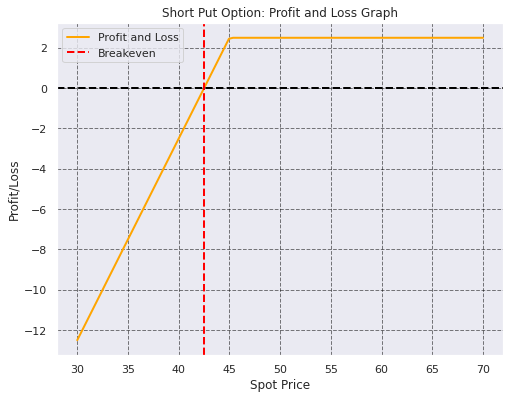

In [8]:
# Test the functions on the example
spot_prices = np.linspace(30, 70, 100)
strike_price = 45.0
premium = 2.5

breakeven_price = short_put_breakeven(strike_price, premium)
print(f"Breakeven Price: {breakeven_price}")

short_put_profit_loss_graph(spot_prices, strike_price, premium)

### Strategy 5: Covered Call Option Strategy

The covered call is a popular options strategy where an investor who owns a specific number of underlying assets (such as stocks) simultaneously sells call options on those assets. By doing so, the investor generates income from the premiums received for selling the call options while still holding the potential for the underlying assets' appreciation. This strategy is often employed by investors who are willing to sell a portion of their underlying assets at a specific price (the strike price) if the call options are exercised.

**Purpose**

The primary purpose of the covered call strategy is to enhance income from the underlying asset holdings. By selling call options against the owned assets, the investor receives premiums, which help to offset potential losses or provide additional profit potential if the assets' prices remain stable or moderately appreciate. The covered call strategy is considered a conservative approach to generating income from an existing stock position.

**Breakeven Price for Covered Call**

The breakeven price for a covered call option can be calculated as follows:

Breakeven Price = (Purchase Price of Underlying Assets - Premiums Received for Call Options) / Number of Owned Assets

To find the breakeven price per asset, subtract the total premiums received for selling the call options from the total purchase price of the underlying assets and then divide by the number of owned assets. If the underlying asset's price at expiration is above the breakeven price, the covered call strategy for each asset will result in a profit. However, if the asset's price declines below the breakeven price, the strategy may not fully protect against losses for each asset.

**Risk and Considerations**

While the covered call strategy offers additional income, it comes with some trade-offs. The potential profit from the covered call is limited to the strike price of the call option, and the investor may miss out on significant gains if the underlying asset's price surges significantly above the strike price. Additionally, if the stock price declines below the breakeven point per asset (purchase price minus premiums received), the covered call strategy may not fully protect against losses for each asset.

It's essential for investors to carefully consider their investment goals, risk tolerance, and outlook on the underlying assets before implementing the covered call strategy. This strategy may be suitable for investors who are willing to part with a portion of their underlying assets at the strike price and generate additional income in exchange for limiting their potential upside.

In the following section, we will explore how to calculate the breakeven price per asset for the covered call option and visualize the potential profit and loss using Python functions and graphs.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def covered_call_breakeven(underlying_price, strike_price, call_premium, num_assets, num_calls):
    breakeven_price = (underlying_price * num_assets - call_premium * num_calls) / num_assets
    return breakeven_price, strike_price

def call_value(spot_price, strike_price):
    a = spot_price - strike_price
    return np.max([a, 0])

def covered_call_profit_loss_graph(spot_prices, underlying_price, strike_price, call_premium, num_assets, num_calls):
    call_values = np.array([call_value(x, strike_price) for x in spot_prices])
    position_value = num_assets * spot_prices - num_calls * (call_values - call_premium)
    profit_loss = position_value - num_assets * underlying_price
    breakeven_price, strike_price = covered_call_breakeven(underlying_price, strike_price, call_premium, num_assets, num_calls)

    plt.figure(figsize=(8, 6))
    sns.set_style('dark')  # Set the dark theme with black grid
    sns.set_palette('tab10')  # Set a color palette for the lines

    plt.plot(spot_prices, profit_loss, color='blue', lw=2, label='Profit and Loss')
    plt.axhline(0, color='black', ls='--', lw=2)  # Breakeven line
    plt.axvline(breakeven_price, color='red', ls='--', lw=2, label='Breakeven')  # Breakeven price
    plt.xlabel('Spot Price')
    plt.ylabel('Profit/Loss')
    plt.title('Covered Call Strategy: Profit and Loss Graph')
    plt.grid(True, color='black', linestyle='--', alpha=0.5)  # Set the grid color to black
    plt.legend()
    plt.show()


Breakeven Price: 95.0


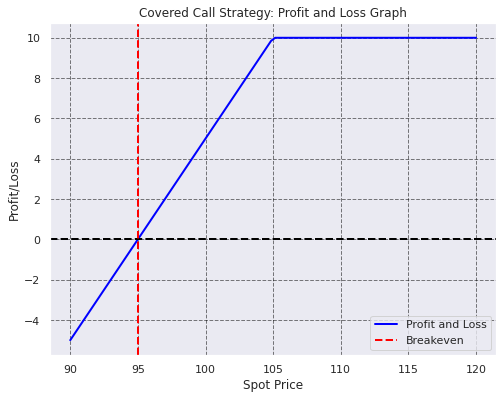

In [10]:
# Example usage:
spot_prices = np.linspace(90, 120, 100)
underlying_price = 100.0
strike_price = 105.0
call_premium = 5
num_assets = 1
num_calls = 1

breakeven_price, strike_price = covered_call_breakeven(underlying_price, strike_price, call_premium, num_assets, num_calls)
print(f"Breakeven Price: {breakeven_price}")

covered_call_profit_loss_graph(spot_prices, underlying_price, strike_price, call_premium, num_assets, num_calls)

### Strategy 6: Protective Put Option Strategy

The protective put is a risk management strategy designed to protect an existing long position in an asset (such as stocks) from significant downside risk. This strategy involves purchasing a put option on the same asset, effectively giving the investor the right to sell the asset at a predetermined strike price, regardless of its market price.

**Purpose**

The primary purpose of the protective put strategy is to limit potential losses in a long position, especially during market downturns or periods of high volatility. By purchasing a put option, the investor has downside protection, as the value of the put option increases as the asset's price declines. The protective put is also known as a "married put" because the put option is married or paired with the long asset position.

**Implementation**

To implement the protective put strategy, an investor who holds a long position in an asset can purchase a put option with a strike price at or near the current market price of the asset. If the asset's price declines below the strike price, the put option provides the investor the right to sell the asset at the strike price, limiting the potential loss on the long position.

**Risk and Considerations**

While the protective put strategy provides downside protection, it also comes with the cost of purchasing the put option (the premium). If the asset's price remains stable or increases, the investor may incur a loss equivalent to the premium paid for the put option. 

In the following section, we will explore how to calculate the breakeven price for the protective put option and visualize the potential profit and loss using Python functions and graphs.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def protective_put_breakeven(asset_price, strike_price, put_premium, num_assets, num_puts):
    n = num_assets
    m = num_puts
    p = put_premium
    x = asset_price
    s = strike_price
    if n == m:
        break_even_price_1 = x+2*(m/n)*p
        return [break_even_price_1]
    else:
        break_even_price_1 = (1/(n-m))*(n*x+m*(p-s))
        break_even_price_2 = x+2*(m/n)*p
        return [break_even_price_1, break_even_price_2]

def put_value(spot_price, strike_price):
    a = strike_price - spot_price
    return np.max([a, 0])

def protective_put_value(asset_price, strike_price, put_premium, num_assets, num_puts):
    n = num_assets
    m = num_puts
    p = put_premium
    x = asset_price
    s = strike_price
    a = put_value(asset_price, strike_price)
    
    return n * x + m*a - m*p
    

def protective_put_profit_loss_graph(spot_prices, asset_price, strike_price, put_premium, num_assets, num_puts):
    n = num_assets
    m = num_puts
    p = put_premium
    x = asset_price
    s = strike_price
    
    investment = n*x + m*p
    put_values = np.array([put_value(x, underlying_price) for x in spot_prices])
    position_value = num_assets * spot_prices + m*put_values - m*put_premium
    profit_loss = position_value - investment
    
    A = protective_put_breakeven(asset_price, strike_price, put_premium, num_assets, num_puts)
    
    if len(A) == 2:
        be1 = A[0]
        be2 = A[1]
        
        
        plt.figure(figsize=(8, 6))
        sns.set_style('dark')  # Set the dark theme with black grid
        sns.set_palette('tab10')  # Set a color palette for the lines

        plt.plot(spot_prices, profit_loss, color='blue', lw=2, label='Profit and Loss')
        plt.axhline(0, color='black', ls='--', lw=2)  # Breakeven line
        plt.axvline(be1, color='red', ls='--', lw=2, label='Breakeven')  # Breakeven price 1
        plt.axvline(be2, color='red', ls='--', lw=2)  # Breakeven price 2
        plt.xlabel('Spot Price')
        plt.ylabel('Profit/Loss')
        plt.title('Protective Put Strategy: Profit and Loss Graph')
        plt.grid(True, color='black', linestyle='--', alpha=0.5)  # Set the grid color to black
        plt.legend()
        plt.show()
        
    if len(A) == 1:
        be1 = A[0]

        plt.figure(figsize=(8, 6))
        sns.set_style('dark')  # Set the dark theme with black grid
        sns.set_palette('tab10')  # Set a color palette for the lines

        plt.plot(spot_prices, profit_loss, color='blue', lw=2, label='Profit and Loss')
        plt.axhline(0, color='black', ls='--', lw=2)  # Breakeven line
        plt.axvline(be1, color='red', ls='--', lw=2, label='Breakeven')  # Breakeven price 1
        plt.xlabel('Spot Price')
        plt.ylabel('Profit/Loss')
        plt.title('Protective Put Strategy: Profit and Loss Graph')
        plt.grid(True, color='black', linestyle='--', alpha=0.5)  # Set the grid color to black
        plt.legend()
        plt.show()

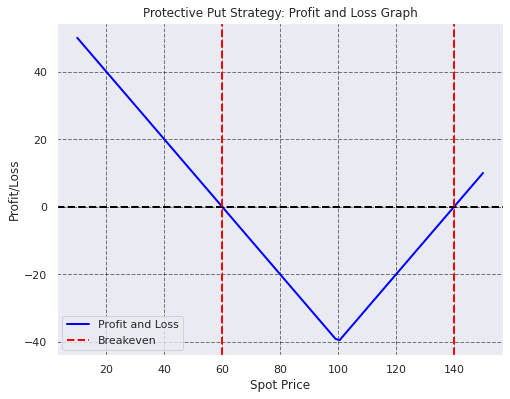

In [12]:
# Example usage

put_premium = 10
num_assets = 1
asset_price = 100
spot_prices = np.linspace(10, 150, 100)
strike_price = 90
num_puts = 2

protective_put_profit_loss_graph(spot_prices, asset_price, strike_price, put_premium, num_assets, num_puts)

### Strategy 7: Straddle Option Strategy

The straddle option strategy is a neutral strategy that involves simultaneously purchasing both call options and put options on the same underlying asset with the same strike price and expiration date. This strategy is employed when the investor expects significant price volatility in the underlying asset but is uncertain about the direction of the price movement.

**Purpose**

The primary purpose of the straddle strategy is to profit from large price swings in the underlying asset, regardless of whether the price moves up or down. By purchasing both a call and a put option, the investor has the potential to benefit from a substantial price change in either direction. The profit potential is unlimited in the case of a significant price movement, while the risk is limited to the combined premium paid for both options if the price remains relatively stable.

**Risk and Considerations**

The straddle strategy is considered a high-risk strategy due to the initial cost of purchasing both call and put options. If the underlying asset's price remains relatively stable, the investor may face a loss equal to the total premium paid for both options. Additionally, if the price does not move significantly in either direction, both options may expire worthless, resulting in a 100% loss of the initial investment.

Investors considering the straddle strategy should have a strong belief in the potential for significant price volatility in the underlying asset and a clear understanding of the risks involved. The strategy is best suited for scenarios where the investor expects an impending event or announcement that could trigger substantial market fluctuations.

In the following section, we will explore how to calculate the breakeven price for the straddle option and visualize the potential profit and loss using Python functions and graphs.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def put_value(spot_price, strike_price):
    a = strike_price - spot_price
    return np.max([a, 0])

def call_value(spot_price, strike_price):
    a = spot_price - strike_price
    return np.max([a,0])

def straddle_option_value(spot_price, strike_price_call, call_premium, num_calls, strike_price_put, put_premium, num_puts):
    c = call_value(spot_price, strike_price_call)
    p = put_value(spot_price, strike_price_put)
    return num_calls*c + num_puts*p


def stradle_option_breakeven(strike_price_call, call_premium, num_calls, strike_price_put, put_premium, num_puts):
    n = num_calls
    p1 = call_premium
    s1 = strike_price_call
    m = num_puts
    p2 = put_premium
    s2 = strike_price_put
    
    be1 = (1/n)*(s1*n+n*p1+m*p2)
    be2 = (1/m)*(m*s2-(n*p1+m*p2))
    
    return [be1, be2]




def stradle_option_profit_loss_graph(spot_prices, asset_price, strike_price_call, call_premium, num_calls, strike_price_put, put_premium, num_puts):
    a = asset_price
    cs = strike_price_call
    cp = call_premium
    cn = num_calls
    ps = strike_price_put
    pp = put_premium
    pn = num_puts
    
    investment = cn*cp + pn*cp
    position_values = [straddle_option_value(Z, strike_price_call, call_premium, num_calls, strike_price_put, put_premium, num_puts) for Z in spot_prices]
    profit_loss = np.array(position_values) - investment
    
    A = stradle_option_breakeven(strike_price_call, call_premium, num_calls, strike_price_put, put_premium, num_puts)
    be1 = A[0]
    be2 = A[1]
    
    plt.figure(figsize=(8, 6))
    sns.set_style('dark')  # Set the dark theme with black grid
    sns.set_palette('tab10')  # Set a color palette for the lines

    plt.plot(spot_prices, profit_loss, color='blue', lw=2, label='Profit and Loss')
    plt.axhline(0, color='black', ls='--', lw=2)  # Breakeven line
    plt.axvline(be1, color='red', ls='--', lw=2, label='Breakeven')  # Breakeven price 1
    plt.axvline(be2, color='red', ls='--', lw=2)  # Breakeven price 2
    plt.xlabel('Spot Price')
    plt.ylabel('Profit/Loss')
    plt.title('Stradle Option Strategy: Profit and Loss Graph')
    plt.grid(True, color='black', linestyle='--', alpha=0.5)  # Set the grid color to black
    plt.legend()
    plt.show()
    

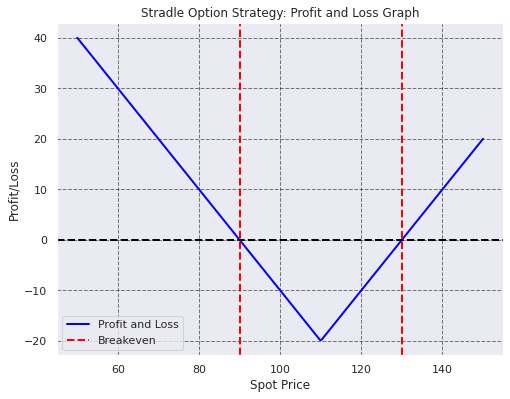

In [14]:
# Example usage

put_premium = 10
num_calls = 1
asset_price = 100
spot_prices = np.linspace(50, 150, 300)
strike_price_put = 110
strike_price_call = 110
num_puts = 1
call_premium = 10

stradle_option_profit_loss_graph(spot_prices, asset_price, strike_price_call, call_premium, num_calls, strike_price_put, put_premium, num_puts)

### Strategy 8: Strangle Option Strategy

The strangle option strategy is similar to the straddle strategy, but with one key difference - the strike prices of the call and put options are different. This neutral strategy involves simultaneously purchasing both a call option with a higher strike price and a put option with a lower strike price on the same underlying asset and with the same expiration date. The strangle strategy is employed when the investor expects significant price volatility in the underlying asset but is unsure about the direction of the price movement.

**Purpose**

The primary purpose of the strangle strategy is also to profit from large price swings in the underlying asset. By purchasing both a call and a put option, the investor has the potential to benefit from a substantial price change in either direction. The strangle strategy is often used when the investor believes that the asset's price will move significantly, but is uncertain about the direction of the price movement.

**Risk and Considerations**

Similar to the straddle strategy, the strangle strategy involves high risk due to the initial cost of purchasing both call and put options. If the underlying asset's price remains relatively stable, the investor may face a loss equal to the total premium paid for both options. However, compared to the straddle strategy, the strangle strategy has a lower upfront cost because the call and put options have different strike prices.

As with any options strategy, it's essential for investors to carefully consider their risk tolerance and market outlook before implementing the strangle strategy. The strategy is best suited for scenarios where the investor expects significant price volatility but is unsure about the direction of the price movement.

In the following section, we will explore how to calculate the breakeven price for the strangle option and visualize the potential profit and loss using Python functions and graphs.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def put_value(spot_price, strike_price):
    a = strike_price - spot_price
    return np.max([a, 0])

def call_value(spot_price, strike_price):
    a = spot_price - strike_price
    return np.max([a,0])

def strangle_option_value(spot_price, strike_price_call, call_premium, num_calls, strike_price_put, put_premium, num_puts):
    c = call_value(spot_price, strike_price_call)
    p = put_value(spot_price, strike_price_put)
    return num_calls*c + num_puts*p


def strangle_option_breakeven(strike_price_call, call_premium, num_calls, strike_price_put, put_premium, num_puts):
    n = num_calls
    p1 = call_premium
    s1 = strike_price_call
    m = num_puts
    p2 = put_premium
    s2 = strike_price_put
    
    be1 = (1/n)*(s1*n+n*p1+m*p2)
    be2 = (1/m)*(m*s2-(n*p1+m*p2))
    
    return [be1, be2]




def strangle_option_profit_loss_graph(spot_prices, asset_price, strike_price_call, call_premium, num_calls, strike_price_put, put_premium, num_puts):
    a = asset_price
    cs = strike_price_call
    cp = call_premium
    cn = num_calls
    ps = strike_price_put
    pp = put_premium
    pn = num_puts
    
    investment = cn*cp + pn*cp
    position_values = [strangle_option_value(Z, strike_price_call, call_premium, num_calls, strike_price_put, put_premium, num_puts) for Z in spot_prices]
    profit_loss = np.array(position_values) - investment
    
    A = strangle_option_breakeven(strike_price_call, call_premium, num_calls, strike_price_put, put_premium, num_puts)
    be1 = A[0]
    be2 = A[1]
    
    plt.figure(figsize=(8, 6))
    sns.set_style('dark')  # Set the dark theme with black grid
    sns.set_palette('tab10')  # Set a color palette for the lines

    plt.plot(spot_prices, profit_loss, color='blue', lw=2, label='Profit and Loss')
    plt.axhline(0, color='black', ls='--', lw=2)  # Breakeven line
    plt.axvline(be1, color='red', ls='--', lw=2, label='Breakeven')  # Breakeven price 1
    plt.axvline(be2, color='red', ls='--', lw=2)  # Breakeven price 2
    plt.xlabel('Spot Price')
    plt.ylabel('Profit/Loss')
    plt.title('Strangle Option Strategy: Profit and Loss Graph')
    plt.grid(True, color='black', linestyle='--', alpha=0.5)  # Set the grid color to black
    plt.legend()
    plt.show()
    

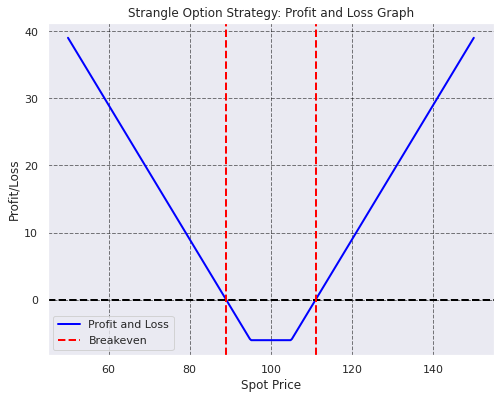

In [16]:
# Example usage

put_premium = 3
num_calls = 1
asset_price = 100
spot_prices = np.linspace(50, 150, 300)
strike_price_put = 95
strike_price_call = 105
num_puts = 1
call_premium = 3

strangle_option_profit_loss_graph(spot_prices, asset_price, strike_price_call, call_premium, num_calls, strike_price_put, put_premium, num_puts)

### Strategy 9: Bull Call Spread Option Strategy

The bull call spread, also known as a long call spread or debit call spread, is a bullish options strategy that involves the simultaneous purchase and sale of two call options on the same underlying asset with the same expiration date. The strategy is used when the investor expects a moderate increase in the underlying asset's price.

**How the Bull Call Spread Works**

The bull call spread is constructed by purchasing a lower strike call option and simultaneously selling a higher strike call option. Both options must have the same expiration date. The purchased call option has a lower strike price and is closer to the current market price of the underlying asset. The sold call option has a higher strike price and is further away from the current market price.

**Purpose**

The primary purpose of the bull call spread strategy is to profit from a moderate rise in the underlying asset's price. The lower strike call option provides upside potential, while the sold higher strike call option helps to reduce the overall cost of the position. By combining these two options, the investor can limit both the potential profit and loss of the strategy.

**Risk and Considerations**

While the bull call spread strategy offers limited risk, it also has limited profit potential. The maximum profit is achieved when the underlying asset's price is above the higher strike price at expiration. If the underlying asset's price remains below the lower strike price, both options may expire worthless, resulting in a maximum loss equal to the initial cost of the spread.

Investors should carefully assess their market outlook and risk tolerance before implementing the bull call spread strategy. This strategy is best suited for scenarios where the investor expects a moderate increase in the underlying asset's price and wants to manage risk by combining long and short call options.

In the following section, we will explore how to calculate the breakeven price for the bull call spread option and visualize the potential profit and loss using Python functions and graphs.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def call_value(spot_price, strike_price):
    a = spot_price - strike_price
    return np.max([a,0])

def bull_call_value(spot_price, strike_price_1, num_calls_1, strike_price_2, num_calls_2):
    c1 = call_value(spot_price, strike_price_1)
    c2 = call_value(spot_price, strike_price_2)
    return num_calls_1*c1-num_calls_2*c2


#def bull_call_breakeven(strike_price_call, call_premium, num_calls, strike_price_put, put_premium, num_puts):




def bull_call_profit_loss_graph(spot_prices, strike_price_1, num_calls_1, premium_1, strike_price_2, num_calls_2, premium_2):

    
    investment = -num_calls_1*premium_1+num_calls_2*premium_2
    position_values = [bull_call_value(Z, strike_price_1, num_calls_1, strike_price_2, num_calls_2) for Z in spot_prices]
    profit_loss = np.array(position_values) - investment
    
    
    plt.figure(figsize=(8, 6))
    sns.set_style('dark')  # Set the dark theme with black grid
    sns.set_palette('tab10')  # Set a color palette for the lines

    plt.plot(spot_prices, profit_loss, color='blue', lw=2, label='Profit and Loss')
    plt.axhline(0, color='black', ls='--', lw=2)  # Breakeven line
    #plt.axvline(be1, color='red', ls='--', lw=2, label='Breakeven')  # Breakeven price 1
    #plt.axvline(be2, color='red', ls='--', lw=2)  # Breakeven price 2
    plt.xlabel('Spot Price')
    plt.ylabel('Profit/Loss')
    plt.title('Bull Call Strategy: Profit and Loss Graph')
    plt.grid(True, color='black', linestyle='--', alpha=0.5)  # Set the grid color to black
    plt.legend()
    plt.show()
    

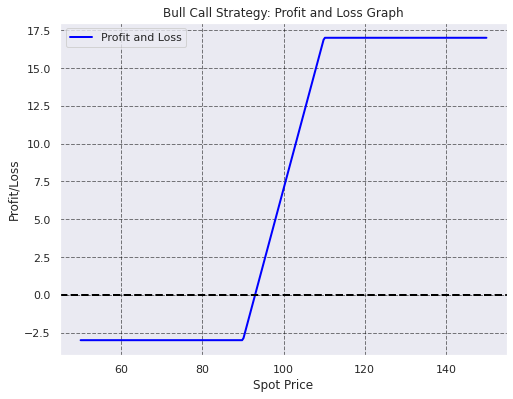

In [18]:
# Example usage
spot_prices = np.linspace(50, 150, 300)
strike_price_1 = 90
num_calls_1 = 1
premium_1 = 2
strike_price_2 = 110
num_calls_2 = 1
premium_2 = 5



bull_call_profit_loss_graph(spot_prices, strike_price_1, num_calls_1, premium_1, strike_price_2, num_calls_2, premium_2)

### Strategy 10: Bear Put Spread Option Strategy

The bear put spread, also known as a long put spread or debit put spread, is a bearish options strategy that involves the simultaneous purchase and sale of two put options on the same underlying asset with the same expiration date. The strategy is used when the investor expects a moderate decrease in the underlying asset's price.

**How the Bear Put Spread Works**

The bear put spread is constructed by purchasing a higher strike put option and simultaneously selling a lower strike put option. Both options must have the same expiration date. The purchased put option has a higher strike price and is further away from the current market price of the underlying asset. The sold put option has a lower strike price and is closer to the current market price.

**Purpose**

The primary purpose of the bear put spread strategy is to profit from a moderate decline in the underlying asset's price. The higher strike put option provides downside protection, while the sold lower strike put option helps to reduce the overall cost of the position. By combining these two options, the investor can limit both the potential profit and loss of the strategy.

**Risk and Considerations**

While the bear put spread strategy offers limited risk, it also has limited profit potential. The maximum profit is achieved when the underlying asset's price is below the lower strike price at expiration. If the underlying asset's price remains above the higher strike price, both options may expire worthless, resulting in a maximum loss equal to the initial cost of the spread.

Investors should carefully assess their market outlook and risk tolerance before implementing the bear put spread strategy. This strategy is best suited for scenarios where the investor expects a moderate decrease in the underlying asset's price and wants to manage risk by combining long and short put options.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def put_value(spot_price, strike_price):
    a = -spot_price + strike_price
    return np.max([a,0])

def bear_put_value(spot_price, strike_price_1, num_puts_1, strike_price_2, num_puts_2):
    p1 = put_value(spot_price, strike_price_1)
    p2 = put_value(spot_price, strike_price_2)
    return num_puts_1*p1-num_puts_2*p2


#def bear_put_breakeven(strike_price_call, call_premium, num_calls, strike_price_put, put_premium, num_puts):




import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def bear_put_profit_loss_graph(spot_prices, strike_price_1, num_puts_1, premium_1, strike_price_2, num_puts_2, premium_2):
    investment = -num_puts_1 * premium_1 + num_puts_2 * premium_2
    position_values = [bear_put_value(Z, strike_price_1, num_puts_1, strike_price_2, num_puts_2) for Z in spot_prices]
    profit_loss = np.array(position_values) - investment

    plt.figure(figsize=(8, 6))
    sns.set_style('dark')
    sns.set_palette('tab10')

    plt.plot(spot_prices, profit_loss, color='blue', lw=2, label='Profit and Loss')
    plt.axhline(0, color='black', ls='--', lw=2)
    plt.xlabel('Spot Price')
    plt.ylabel('Profit/Loss')
    plt.title('Bear Put Strategy: Profit and Loss Graph')
    plt.grid(True, color='black', linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()

    

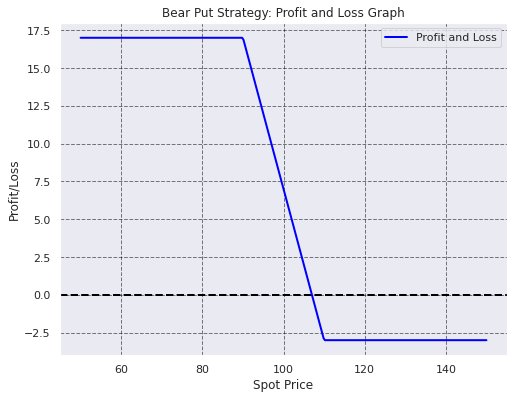

In [20]:
# Example usage
spot_prices = np.linspace(50, 150, 300)
strike_price_1 = 110
num_puts_1 = 1
premium_1 = 5
strike_price_2 = 90
num_puts_2 = 1
premium_2 = 8



bear_put_profit_loss_graph(spot_prices, strike_price_1, num_puts_1, premium_1, strike_price_2, num_puts_2, premium_2)